In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn_evaluation import plot
import loadData
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree._tree import TREE_LEAF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load data
training_set, testing_set = loadData.loadDataWithoutTestSet('processed.cleveland.data', split_to_test=True)
# get features and labels
training_set_labels = training_set.iloc[:,-1]
training_set = training_set.iloc[:,0:-1]

training_set_labels.reset_index(drop=True, inplace=True)
training_set.reset_index(drop=True, inplace=True)

testing_set_labels = testing_set.iloc[:,-1]
testing_set = testing_set.iloc[:,0:-1]

testing_set_labels.reset_index(drop=True, inplace=True)
testing_set.reset_index(drop=True, inplace=True)

print(training_set.shape)
print(testing_set.shape)

training_set.replace('?',0, inplace=True)
testing_set.replace('?',0, inplace=True)

training_set[['ca','thal']] = training_set[['ca','thal']].apply(pd.to_numeric)
testing_set[['ca','thal']] = testing_set[['ca','thal']].apply(pd.to_numeric)

(242, 13)
(61, 13)


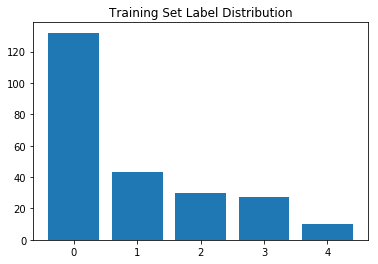

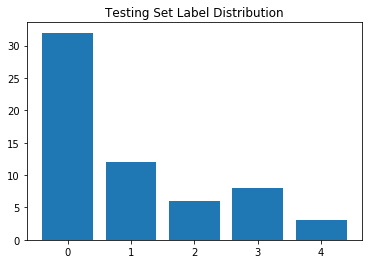

In [3]:
plt.bar(['0','1', '2', '3', '4'],[len(training_set_labels[training_set_labels==0]), 
         len(training_set_labels[training_set_labels==1]), 
             len(training_set_labels[training_set_labels==2]),
                len(training_set_labels[training_set_labels==3]),
                   len(training_set_labels[training_set_labels==4])])
plt.title('Training Set Label Distribution')
plt.savefig('dataset2_training_set_label_dist.png')
plt.show()
                 
plt.bar(['0','1', '2', '3', '4'],[len(testing_set_labels[testing_set_labels==0]), 
         len(testing_set_labels[testing_set_labels==1]), 
             len(testing_set_labels[testing_set_labels==2]),
                len(testing_set_labels[testing_set_labels==3]),
                   len(testing_set_labels[testing_set_labels==4])])
plt.title('Testing Set Label Distribution')
plt.savefig('dataset2_testing_set_label_dist.png')
plt.show()

In [4]:
# decision tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(training_set, training_set_labels)

predicted_training_set_labels = dtc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = dtc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.45901639344262296


In [5]:
criterion = ['gini', 'entropy']
splitter  = ['best','random']
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3, 4, 5]
param_grid = dict(criterion = criterion, splitter = splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
grid_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid)
grid_result_dtc = grid_dtc.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_dtc.best_score_, grid_result_dtc.best_params_))
means = grid_result_dtc.cv_results_['mean_test_score']
stds = grid_result_dtc.cv_results_['std_test_score']
params = grid_result_dtc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_training_set_labels = grid_dtc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_dtc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

Best: 0.578512 using {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.578512 (0.038098) with: {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.570248 (0.021384) with: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'random'}
0.566116 (0.020551) with: {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'}
0.566116 (0.040968) with: {'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}
0.561983 (0.017221) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.557851 (0.031176) with: {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'}
0.549587 (0.026113) with: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'random'}
0.545455 (0.025521) with: {'criterion': 'entropy', 'min_s

In [6]:
target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.72      0.88      0.79        32
    class 1       0.18      0.17      0.17        12
    class 2       0.00      0.00      0.00         6
    class 3       0.29      0.25      0.27         8
    class 4       0.00      0.00      0.00         3

avg / total       0.45      0.52      0.48        61



/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'entropy', 'splitter': 'random'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_dtc1.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'gini', 'splitter': 'random'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc2.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'entropy', 'splitter': 'best'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc3.png')
# fig.clf()
# ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
#                       subset={'criterion': 'gini', 'splitter': 'best'})
# fig = ax.get_figure()
# fig.savefig('dataset2_dtc4.png')
# fig.clf()

In [8]:
# dtc = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
# dtc.fit(training_set, training_set_labels)
# dot_data = tree.export_graphviz(dtc, out_file='dataset2_tree.dot', feature_names=training_set.columns, 
#                                 filled=True, rounded=True)  
# graph = graphviz.Source(dot_data)
# from subprocess import check_call
# #check_call(['dot','-Tpng','dataset2_tree.dot','-o','dataset2_tree.png'])

In [9]:
# neural networks
nn = MLPClassifier()
nn.fit(training_set, training_set_labels)

predicted_training_set_labels = nn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = nn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

0.5165289256198347
0.5409836065573771


In [10]:
alphas = [0.0001, 0.0002, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01]
learning_rates = [0.001, 0.002, 0.005, 0.007, 0.01]
momentums = [0.9, 0.85, 0.8, 0.75, 0.7]
param_grid = dict(alpha=alphas, learning_rate_init = learning_rates, momentum = momentums)
grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid)
grid_result_nn = grid_nn.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
means = grid_result_nn.cv_results_['mean_test_score']
stds = grid_result_nn.cv_results_['std_test_score']
params = grid_result_nn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_training_set_labels = grid_nn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc_nn=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_nn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc_nn=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc_nn)
print(testing_set_acc_nn)

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best: 0.557851 using {'alpha': 0.001, 'learning_rate_init': 0.007, 'momentum': 0.85}
0.557851 (0.010967) with: {'alpha': 0.001, 'learning_rate_init': 0.007, 'momentum': 0.85}
0.549587 (0.010605) with: {'alpha': 0.0005, 'learning_rate_init': 0.007, 'momentum': 0.85}
0.549587 (0.026425) with: {'alpha': 0.005, 'learning_rate_init': 0.007, 'momentum': 0.7}
0.549587 (0.017863) with: {'alpha': 0.005, 'learning_rate_init': 0.01, 'momentum': 0.75}
0.549587 (0.019707) with: {'alpha': 0.01, 'learning_rate_init': 0.007, 'momentum': 0.8}
0.545455 (0.006349) with: {'alpha': 0.0001, 'learning_rate_init': 0.01, 'momentum': 0.8}
0.545455 (0.006349) with: {'alpha': 0.0001, 'learning_rate_init': 0.01, 'momentum': 0.75}
0.545455 (0.006349) with: {'alpha': 0.0002, 'learning_rate_init': 0.01, 'momentum': 0.7}
0.545455 (0.015431) with: {'alpha': 0.001, 'learning_rate_init': 0.005, 'momentum': 0.85}
0.545455 (0.055216) with: {'alpha': 0.002, 'learning_rate_init': 0.005, 'momentum': 0.9}
0.545455 (0.006349) w

In [11]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.73      0.94      0.82        32
    class 1       0.50      0.08      0.14        12
    class 2       1.00      0.17      0.29         6
    class 3       0.35      0.75      0.48         8
    class 4       0.00      0.00      0.00         3

avg / total       0.63      0.62      0.55        61



/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'learning_rate_init'),
#               subset={'momentum': 0.85})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_NN1.png')
# fig.clf()
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'momentum'),
#               subset={'learning_rate_init': 0.005})
# fig = ax.get_figure()
# fig.savefig('dataset2_NN2.png')
# fig.clf()

In [13]:
# boosting
gbc = GradientBoostingClassifier()
gbc.fit(training_set, training_set_labels)

predicted_training_set_labels = gbc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = gbc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.5409836065573771


In [14]:
nEstimators = [100, 300, 500, 700, 900]
learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
param_grid = dict(learning_rate = learning_rates, n_estimators = nEstimators)
grid_b = GridSearchCV(estimator=gbc, param_grid=param_grid)
grid_result_b = grid_b.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_b.best_score_, grid_result_b.best_params_))
means = grid_result_b.cv_results_['mean_test_score']
stds = grid_result_b.cv_results_['std_test_score']
params = grid_result_b.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
predicted_training_set_labels = grid_b.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_b.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

Best: 0.557851 using {'learning_rate': 1.0, 'n_estimators': 900}
0.557851 (0.048309) with: {'learning_rate': 1.0, 'n_estimators': 900}
0.549587 (0.020704) with: {'learning_rate': 0.3, 'n_estimators': 500}
0.545455 (0.006349) with: {'learning_rate': 0.5, 'n_estimators': 300}
0.545455 (0.038687) with: {'learning_rate': 1.0, 'n_estimators': 300}
0.545455 (0.056132) with: {'learning_rate': 1.0, 'n_estimators': 500}
0.541322 (0.023668) with: {'learning_rate': 0.3, 'n_estimators': 300}
0.541322 (0.021462) with: {'learning_rate': 0.5, 'n_estimators': 100}
0.541322 (0.012122) with: {'learning_rate': 0.5, 'n_estimators': 500}
0.541322 (0.012122) with: {'learning_rate': 0.5, 'n_estimators': 700}
0.537190 (0.027012) with: {'learning_rate': 0.3, 'n_estimators': 100}
0.537190 (0.027012) with: {'learning_rate': 0.3, 'n_estimators': 700}
0.537190 (0.027012) with: {'learning_rate': 0.3, 'n_estimators': 900}
0.537190 (0.017894) with: {'learning_rate': 0.5, 'n_estimators': 900}
0.537190 (0.044433) with:

In [15]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.74      0.88      0.80        32
    class 1       0.18      0.17      0.17        12
    class 2       0.00      0.00      0.00         6
    class 3       0.17      0.12      0.14         8
    class 4       0.00      0.00      0.00         3

avg / total       0.44      0.51      0.47        61



In [16]:
# ax = plot.grid_search(grid_b.grid_scores_, change=('learning_rate', 'n_estimators'))
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_boosting1.png')
# fig.clf()

In [17]:
# KNN
knn = KNeighborsClassifier()
knn.fit(training_set, training_set_labels)

predicted_training_set_labels = knn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = knn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

0.6322314049586777
0.47540983606557374


In [18]:
n_neighbors = [5, 6, 7, 8, 9, 10]
weights = ["uniform", "distance"]
p = [1, 2, 3, 4]
param_grid = dict(n_neighbors = n_neighbors, weights = weights, p = p)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid)
grid_result_knn = grid_knn.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_training_set_labels = grid_knn.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_knn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

Best: 0.566116 using {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.566116 (0.024700) with: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.561983 (0.009485) with: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.557851 (0.020342) with: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.553719 (0.034893) with: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.549587 (0.026113) with: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.541322 (0.031937) with: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.541322 (0.022800) with: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
0.537190 (0.026517) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.537190 (0.034489) with: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
0.537190 (0.026255) with: {'n_neighbors': 9, 'p': 3, 'weights': 'uniform'}
0.537190 (0.000433) with: {'n_neighbors': 10, 'p': 3, 'weights': 'uniform'}
0.533058 (0.030462) with: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.533058 (0.028716)

In [19]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.60      0.94      0.73        32
    class 1       0.00      0.00      0.00        12
    class 2       0.25      0.17      0.20         6
    class 3       0.00      0.00      0.00         8
    class 4       0.00      0.00      0.00         3

avg / total       0.34      0.51      0.40        61



/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
# ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'uniform'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_knn1.png')
# fig.clf()
# ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'distance'})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_knn2.png')
# fig.clf()

In [21]:
# SVM
svm_c = svm.SVC()
svm_c.fit(training_set, training_set_labels)

predicted_training_set_labels = svm_c.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = svm_c.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

1.0
0.5245901639344263


In [22]:
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(C = C_range, gamma = gamma_range)
grid_svc = GridSearchCV(estimator=svm_c, param_grid=param_grid)
grid_result_svc = grid_svc.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))
means = grid_result_svc.cv_results_['mean_test_score']
stds = grid_result_svc.cv_results_['std_test_score']
params = grid_result_svc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_training_set_labels = grid_svc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_svc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

Best: 0.590909 using {'C': 1000.0, 'gamma': 1e-05}
0.590909 (0.024437) with: {'C': 1000.0, 'gamma': 1e-05}
0.582645 (0.020063) with: {'C': 10000.0, 'gamma': 1e-05}
0.561983 (0.016739) with: {'C': 10.0, 'gamma': 0.0001}
0.561983 (0.000722) with: {'C': 100.0, 'gamma': 1e-05}
0.561983 (0.052351) with: {'C': 100000.0, 'gamma': 1e-05}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 1e-05}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 0.0001}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 0.001}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 0.01}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 0.1}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 1.0}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 10.0}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 100.0}
0.545455 (0.006349) with: {'C': 0.001, 'gamma': 1000.0}
0.545455 (0.006349) with: {'C': 0.01, 'gamma': 1e-05}
0.545455 (0.006349) with: {'C': 0.01, 'gamma': 0.0001}
0.545455 (0.006349) with: {'C': 0.01, 'gamma': 0.001}
0.545455 (0.00

In [23]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.77      0.94      0.85        32
    class 1       0.31      0.33      0.32        12
    class 2       0.00      0.00      0.00         6
    class 3       0.00      0.00      0.00         8
    class 4       0.00      0.00      0.00         3

avg / total       0.46      0.56      0.51        61



In [24]:
# ax = plot.grid_search(grid_svc.grid_scores_, change=('C', 'gamma'))
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_svm.png')
# fig.clf()

In [25]:
linear_svc=svm.LinearSVC()
C_range = 10. ** np.arange(-3, 8)

param_grid = dict(C = C_range)
grid_linear_svc = GridSearchCV(estimator=linear_svc, param_grid=param_grid)
grid_result_linear_svc = grid_linear_svc.fit(training_set, training_set_labels)


print("Best: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))
means = grid_result_linear_svc.cv_results_['mean_test_score']
stds = grid_result_linear_svc.cv_results_['std_test_score']
params = grid_result_linear_svc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_training_set_labels = grid_result_linear_svc.predict(training_set)
predicted_training_set_labels = pd.DataFrame(predicted_training_set_labels) 
training_set_acc=accuracy_score(training_set_labels, predicted_training_set_labels)

predicted_testing_set_labels = grid_result_linear_svc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)

print(training_set_acc)
print(testing_set_acc)

Best: 0.599174 using {'C': 1000000.0}
0.599174 (0.018615) with: {'C': 1000000.0}
0.582645 (0.015370) with: {'C': 10000000.0}
0.566116 (0.020946) with: {'C': 0.001}
0.541322 (0.030546) with: {'C': 0.01}
0.541322 (0.099943) with: {'C': 1.0}
0.500000 (0.040656) with: {'C': 0.1}
0.483471 (0.155337) with: {'C': 100.0}
0.433884 (0.235415) with: {'C': 1000.0}
0.421488 (0.214435) with: {'C': 100000.0}
0.417355 (0.112009) with: {'C': 10000.0}
0.359504 (0.035863) with: {'C': 10.0}
0.39669421487603307
0.4098360655737705


In [26]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.81      0.53      0.64        32
    class 1       0.00      0.00      0.00        12
    class 2       0.00      0.00      0.00         6
    class 3       0.20      1.00      0.33         8
    class 4       0.00      0.00      0.00         3

avg / total       0.45      0.41      0.38        61



/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


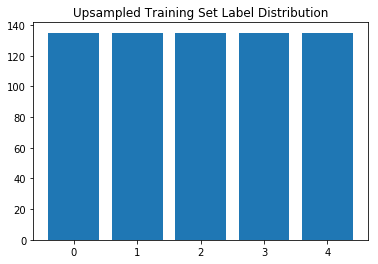

In [27]:
# upsampling data
training_set2, testing_set2 = loadData.loadDataWithoutTestSet('processed.cleveland.data', split_to_test=True)
class_0 = training_set2[training_set2['cancerPresence']==0]
num=len(class_0)
class_1 = training_set2[training_set2['cancerPresence']==1]
class_2 = training_set2[training_set2['cancerPresence']==2]
class_3 = training_set2[training_set2['cancerPresence']==3]
class_4 = training_set2[training_set2['cancerPresence']==4]
class_1_upsampled = resample(class_1, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_2_upsampled = resample(class_2, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_3_upsampled = resample(class_3, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
class_4_upsampled = resample(class_4, 
                                 replace=True,   
                                 n_samples=num,   
                                 random_state=123)
training_set_upsampled=pd.concat([class_0, class_1_upsampled, class_2_upsampled, class_3_upsampled, class_4_upsampled])
training_set_upsampled_labels = training_set_upsampled.iloc[:,-1]
training_set_upsampled = training_set_upsampled.iloc[:,0:-1]

training_set_upsampled_labels.reset_index(drop=True, inplace=True)
training_set_upsampled.reset_index(drop=True, inplace=True)
training_set_upsampled.replace('?',0, inplace=True)

training_set_upsampled[['ca','thal']] = training_set_upsampled[['ca','thal']].apply(pd.to_numeric)


plt.bar(['0','1', '2', '3', '4'],[len(training_set_upsampled_labels[training_set_upsampled_labels==0]), 
         len(training_set_upsampled_labels[training_set_upsampled_labels==1]), 
             len(training_set_upsampled_labels[training_set_upsampled_labels==2]),
                len(training_set_upsampled_labels[training_set_upsampled_labels==3]),
                   len(training_set_upsampled_labels[training_set_upsampled_labels==4])])
plt.title('Upsampled Training Set Label Distribution')
plt.show()

metrics=[]

In [28]:
criterion = ['gini', 'entropy']
splitter  = ['best','random']
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3, 4, 5]
param_grid = dict(criterion = criterion, splitter = splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
grid_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid)
grid_result_dtc = grid_dtc.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_dtc.best_score_, grid_result_dtc.best_params_))
means = grid_result_dtc.cv_results_['mean_test_score']
stds = grid_result_dtc.cv_results_['std_test_score']
params = grid_result_dtc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))

predicted_testing_set_labels = grid_dtc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.914074 using {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.914074 (0.014666) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.908148 (0.014666) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.903704 (0.018265) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.900741 (0.024162) with: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.899259 (0.017149) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.897778 (0.020205) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.896296 (0.035617) with: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.894815 (0.025745) with: {'criterion': 'gini', 'min_samples_l

In [29]:
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'entropy', 'splitter': 'random'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc1.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'gini', 'splitter': 'random'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc2.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'entropy', 'splitter': 'best'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc3.png')
fig.clf()
ax = plot.grid_search(grid_dtc.grid_scores_, change=('min_samples_leaf', 'min_samples_split'), 
                      subset={'criterion': 'gini', 'splitter': 'best'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_dtc4.png')
fig.clf()

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available fro

<Figure size 720x576 with 0 Axes>

In [30]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.89      0.97      0.93        32
    class 1       0.89      0.67      0.76        12
    class 2       0.71      0.83      0.77         6
    class 3       0.83      0.62      0.71         8
    class 4       0.75      1.00      0.86         3

avg / total       0.86      0.85      0.85        61



In [31]:
dtc = tree.DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc.fit(training_set, training_set_labels)
dot_data = tree.export_graphviz(dtc, out_file='dataset2_tree.dot', feature_names=training_set.columns, 
                                filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
from subprocess import check_call
# check_call(['dot','-Tpng','dataset2_tree.dot','-o','dataset2_tree.png'])

In [32]:
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(C = C_range, gamma = gamma_range)
grid_svc = GridSearchCV(estimator=svm_c, param_grid=param_grid)
grid_result_svc = grid_svc.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))
means = grid_result_svc.cv_results_['mean_test_score']
stds = grid_result_svc.cv_results_['std_test_score']
params = grid_result_svc.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
predicted_testing_set_labels = grid_svc.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.952593 using {'C': 1.0, 'gamma': 0.1}
0.952593 (0.019986) with: {'C': 1.0, 'gamma': 0.1}
0.952593 (0.019986) with: {'C': 1.0, 'gamma': 1.0}
0.952593 (0.019986) with: {'C': 1.0, 'gamma': 10.0}
0.952593 (0.019986) with: {'C': 1.0, 'gamma': 100.0}
0.952593 (0.019986) with: {'C': 1.0, 'gamma': 1000.0}
0.952593 (0.019986) with: {'C': 10.0, 'gamma': 0.1}
0.952593 (0.019986) with: {'C': 10.0, 'gamma': 1.0}
0.952593 (0.019986) with: {'C': 10.0, 'gamma': 10.0}
0.952593 (0.019986) with: {'C': 10.0, 'gamma': 100.0}
0.952593 (0.019986) with: {'C': 10.0, 'gamma': 1000.0}
0.952593 (0.019986) with: {'C': 100.0, 'gamma': 0.1}
0.952593 (0.019986) with: {'C': 100.0, 'gamma': 1.0}
0.952593 (0.019986) with: {'C': 100.0, 'gamma': 10.0}
0.952593 (0.019986) with: {'C': 100.0, 'gamma': 100.0}
0.952593 (0.019986) with: {'C': 100.0, 'gamma': 1000.0}
0.952593 (0.019986) with: {'C': 1000.0, 'gamma': 0.1}
0.952593 (0.019986) with: {'C': 1000.0, 'gamma': 1.0}
0.952593 (0.019986) with: {'C': 1000.0, 'gamma':

In [33]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.78      1.00      0.88        32
    class 1       1.00      0.67      0.80        12
    class 2       1.00      0.67      0.80         6
    class 3       1.00      0.62      0.77         8
    class 4       1.00      1.00      1.00         3

avg / total       0.88      0.85      0.85        61



In [34]:
ax = plot.grid_search(grid_svc.grid_scores_, change=('C', 'gamma'))
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_svm.png')
fig.clf()

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [35]:
n_neighbors = [5, 6, 7, 8, 9, 10]
weights = ["uniform", "distance"]
p = [1, 2, 3, 4]
param_grid = dict(n_neighbors = n_neighbors, weights = weights, p = p)
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid)
grid_result_knn = grid_knn.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_testing_set_labels = grid_knn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.859259 using {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.859259 (0.022173) with: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.857778 (0.023796) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.857778 (0.027397) with: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.856296 (0.024162) with: {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.856296 (0.027716) with: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.856296 (0.027237) with: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.853333 (0.027397) with: {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
0.850370 (0.027716) with: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
0.847407 (0.034490) with: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.845926 (0.032727) with: {'n_neighbors': 8, 'p': 3, 'weights': 'distance'}
0.844444 (0.029031) with: {'n_neighbors': 9, 'p': 3, 'weights': 'distance'}
0.842963 (0.027237) with: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
0.842963 (0.032

In [36]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.87      0.84      0.86        32
    class 1       0.62      0.67      0.64        12
    class 2       0.71      0.83      0.77         6
    class 3       0.71      0.62      0.67         8
    class 4       1.00      1.00      1.00         3

avg / total       0.79      0.79      0.79        61



In [37]:
ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'uniform'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_knn1.png')
fig.clf()
ax = plot.grid_search(grid_knn.grid_scores_, change=('n_neighbors', 'p'), subset={'weights': 'distance'})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_knn2.png')
fig.clf()

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [38]:
nEstimators = [100, 300, 500, 700, 900]
learning_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
param_grid = dict(learning_rate = learning_rates, n_estimators = nEstimators)
grid_b = GridSearchCV(estimator=gbc, param_grid=param_grid)
grid_result_b = grid_b.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_b.best_score_, grid_result_b.best_params_))
means = grid_result_b.cv_results_['mean_test_score']
stds = grid_result_b.cv_results_['std_test_score']
params = grid_result_b.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))


predicted_testing_set_labels = grid_b.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.931852 using {'learning_rate': 0.5, 'n_estimators': 100}
0.931852 (0.016761) with: {'learning_rate': 0.5, 'n_estimators': 100}
0.931852 (0.016761) with: {'learning_rate': 0.5, 'n_estimators': 300}
0.931852 (0.016761) with: {'learning_rate': 0.5, 'n_estimators': 500}
0.931852 (0.016761) with: {'learning_rate': 0.5, 'n_estimators': 700}
0.931852 (0.016761) with: {'learning_rate': 0.5, 'n_estimators': 900}
0.928889 (0.022662) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.928889 (0.022662) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.928889 (0.022662) with: {'learning_rate': 0.1, 'n_estimators': 900}
0.925926 (0.018622) with: {'learning_rate': 0.1, 'n_estimators': 700}
0.925926 (0.018622) with: {'learning_rate': 0.3, 'n_estimators': 300}
0.924444 (0.025402) with: {'learning_rate': 0.7, 'n_estimators': 300}
0.924444 (0.029704) with: {'learning_rate': 1.0, 'n_estimators': 900}
0.922963 (0.018265) with: {'learning_rate': 0.3, 'n_estimators': 100}
0.922963 (0.014666) with:

In [39]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.86      0.94      0.90        32
    class 1       0.73      0.67      0.70        12
    class 2       0.67      0.67      0.67         6
    class 3       0.83      0.62      0.71         8
    class 4       1.00      1.00      1.00         3

avg / total       0.82      0.82      0.82        61



In [40]:
ax = plot.grid_search(grid_b.grid_scores_, change=('learning_rate', 'n_estimators'))
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_boosting1.png')
fig.clf()

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [41]:
alphas = [0.0001, 0.0002, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01]
learning_rates = [0.001, 0.002, 0.005, 0.007, 0.01]
hidden_layer_sizes=[(100,), (200,), (300,), (400,), (500,)]
# momentums = [0.9, 0.85, 0.8, 0.75, 0.7]
param_grid = dict(alpha=alphas, learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_sizes)
grid_nn = GridSearchCV(estimator=nn, param_grid=param_grid)
grid_result_nn = grid_nn.fit(training_set_upsampled, training_set_upsampled_labels)


print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
means = grid_result_nn.cv_results_['mean_test_score']
stds = grid_result_nn.cv_results_['std_test_score']
params = grid_result_nn.cv_results_['params']
results = zip(means, stds, params)
for mean, stdev, param in sorted(results, key=lambda x: x[0], reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

predicted_testing_set_labels = grid_nn.predict(testing_set)
predicted_testing_set_labels = pd.DataFrame(predicted_testing_set_labels)
testing_set_acc_nn=accuracy_score(testing_set_labels, predicted_testing_set_labels)


Best: 0.525926 using {'alpha': 0.001, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001}
0.525926 (0.063927) with: {'alpha': 0.001, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001}
0.521481 (0.013739) with: {'alpha': 0.0007, 'hidden_layer_sizes': (500,), 'learning_rate_init': 0.01}
0.509630 (0.036349) with: {'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.002}
0.509630 (0.065152) with: {'alpha': 0.001, 'hidden_layer_sizes': (500,), 'learning_rate_init': 0.001}
0.505185 (0.064949) with: {'alpha': 0.0002, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001}
0.494815 (0.027477) with: {'alpha': 0.0005, 'hidden_layer_sizes': (500,), 'learning_rate_init': 0.001}
0.490370 (0.040788) with: {'alpha': 0.0007, 'hidden_layer_sizes': (400,), 'learning_rate_init': 0.001}
0.485926 (0.039807) with: {'alpha': 0.0007, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001}
0.485926 (0.080356) with: {'alpha': 0.005, 'hidden_layer_sizes': (300,), 'learning

In [42]:
# ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'learning_rate_init'),
#               subset={'hidden_layer_sizes': (300,)})
# fig = ax.get_figure()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('dataset2_NN1.png')
# fig.clf()
ax = plot.grid_search(grid_nn.grid_scores_, change=('alpha', 'hidden_layer_sizes'),
              subset={'learning_rate_init': 0.001})
fig = ax.get_figure()
fig.set_size_inches(10, 8)
fig.savefig('dataset2_NN2.png')
fig.clf()

/Users/tomhuang/.local/share/virtualenvs/assignment1-2RDWss_u/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<Figure size 720x576 with 0 Axes>

In [43]:
print(classification_report(testing_set_labels, predicted_testing_set_labels, target_names=target_names))
metrics.append(precision_recall_fscore_support(testing_set_labels, predicted_testing_set_labels, average='weighted'))

             precision    recall  f1-score   support

    class 0       0.72      0.66      0.69        32
    class 1       0.40      0.33      0.36        12
    class 2       0.00      0.00      0.00         6
    class 3       0.38      0.62      0.48         8
    class 4       0.60      1.00      0.75         3

avg / total       0.54      0.54      0.53        61



In [44]:
print(metrics)
x=['Decision Tree', 'SVM', 'Boosting', 'KNN', 'Neural Net']
plt.bar(x, [prec[0] for prec in metrics])
plt.title('Precisions by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_precisions.png')
plt.clf()

plt.bar(x, [rec[1] for rec in metrics])
plt.title('Recalls by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_recalls.png')
plt.clf()

plt.bar(x, [f[2] for f in metrics])
plt.title('F1 Scores by Classifiers')
plt.ylim(0.0, 1.1)
plt.savefig('dataset2_F1.png')
plt.clf()

[(0.8559328649492582, 0.8524590163934426, 0.8468179728272706, None), (0.8848460615753698, 0.8524590163934426, 0.8460432897441656, None), (0.7910751332221454, 0.7868852459016393, 0.7878244160211373, None), (0.8167624725001773, 0.819672131147541, 0.8150627576910277, None), (0.5385137191807627, 0.5409836065573771, 0.5320647058755095, None)]


<Figure size 432x288 with 0 Axes>